### 預測 Survived

同時考量 'PClass','Age', 'Sex' 三個因數的話，
將樓層直接轉換為對應數字，男生為0, 女生為1,缺失的年齡調整為500, 

減少缺失年齡的資料中排除掉年齡跟死亡造成的關聯性，並且將年齡作分類，

0到10, 10到30, 30到 50, 50到100，分別設為0, 1, 2, 3,
並把前面提到的男生女生設為2和0,樓層關係設為1, 2, 3, 得到的數據如下:

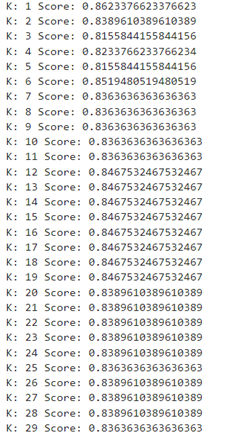

如果選擇將有缺漏值的資料移除的話，會剩下734筆資料，準確度降至如下:

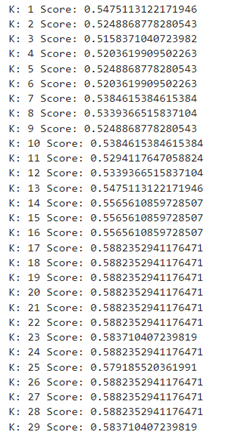

原本的做法是讓有缺漏值的地方就把值統一成500, 
讓模型在有缺漏值的地方根據性別和樓層進行判斷，而資料刪除後，

僅根據性別和樓層判斷的資料數變少，反而準確率降低，
因此決定改成嘗試只使用性別或樓層進行判斷。

只考慮性別的準確度:

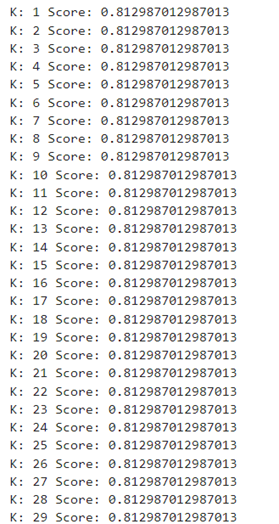

只考慮樓層的準確度:

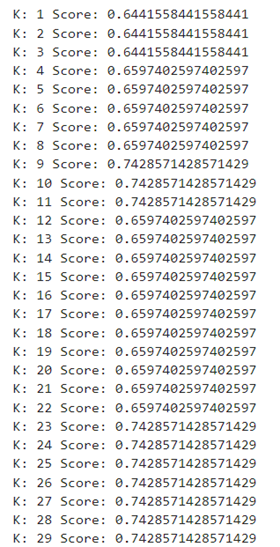

分別考慮性別以及樓層的準確度，會發現只考慮性別的預測成功率會比只考慮年齡高，接下來試著把兩者結合，

並且分別對樓層之間和男女差異之間的數據值關聯權重進行各種調整測試後，最後得到準確度如下:

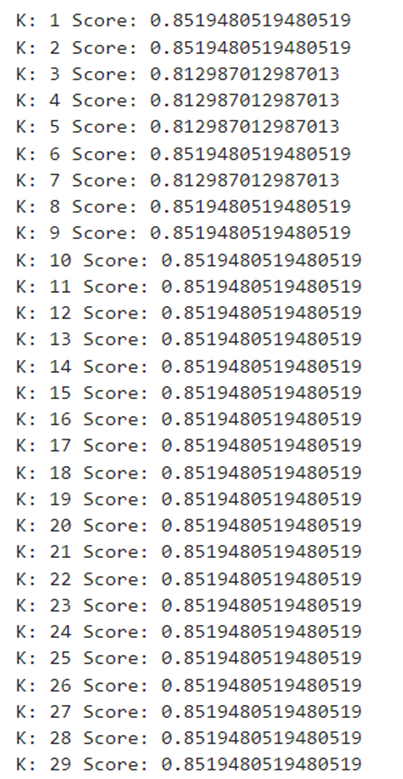

整體的數據比單獨只看性別、單獨只看樓層都來的高，最後選擇採用此方法。

結論: 預測是否存活選擇(樓層和性別)效果最好

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

df = pd.read_csv('titanic.csv')
X = df[['PClass','Sex']][0:1282].replace(['female','male', '1st', '2nd', '3rd'],[1, 0, 1, 2, 3]).fillna(500).values#將NAN替換成
y = df['Survived'][0:1282].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Suitable = 30
for k in range(1, Suitable):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predict_y_test = knn.predict(X_test)
    print('K:', k, 'Score:', knn.score(X_test, y_test))     

### 預測樓層

性別

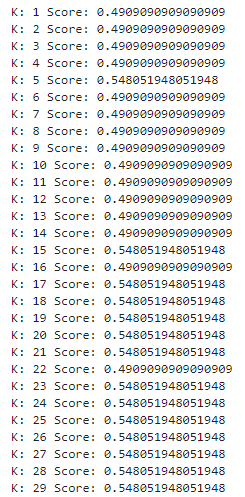

是否存活

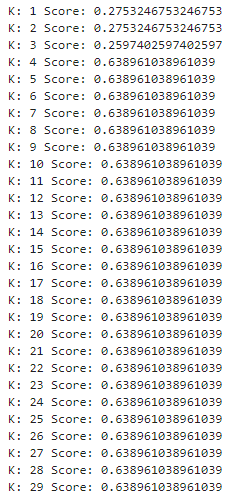

年齡(dropna並且分群)

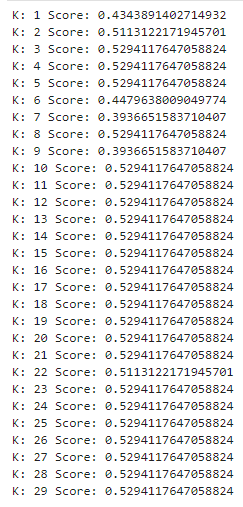

是否存活和性別

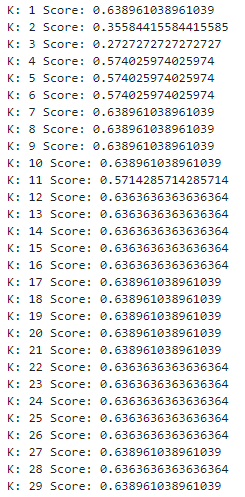

年齡根據 0到10, 10到30, 30到50, 50到100, 以及性別

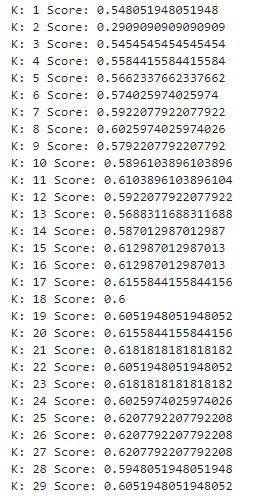

年齡和存活

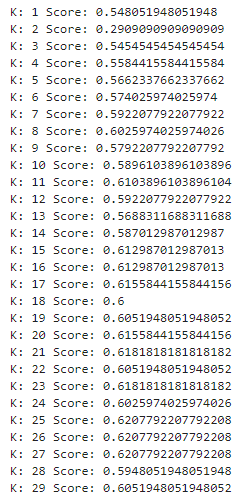

觀察上列圖片可發現，是否存活 和 (是否存活和性別)兩種比較高，

其中兩者都能達到0.638的準確率，整體的數據來說 (是否存活和性別)表現會更好，

因此選擇使用(是否存活和性別)來預測樓層

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

df = pd.read_csv('titanic.csv')
X = df[['Survived', 'Sex']][0:1282].replace(['female','male'],[1, 0]).fillna(500).values#將NAN替換成
y = df['PClass'][0:1282].replace(['1st', '2nd', '3rd'],[1, 2, 3]).values



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Suitable = 30
for k in range(1, Suitable):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predict_y_test = knn.predict(X_test)
    print('K:', k, 'Score:', knn.score(X_test, y_test))     

### 預測性別

樓層

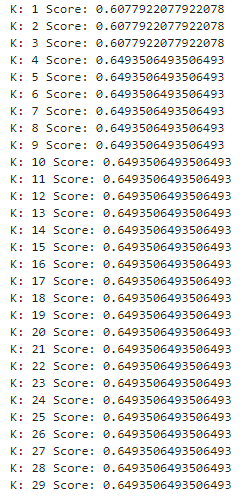

是否存活

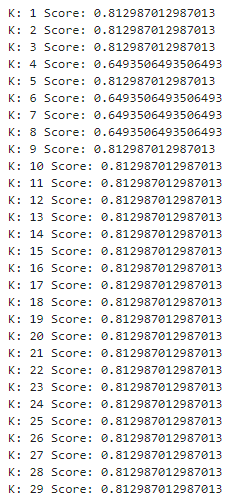

年齡(dropna 並且分群)

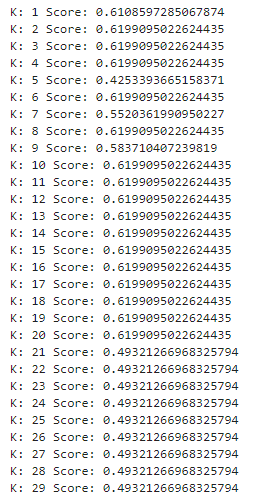

是否存活和樓層

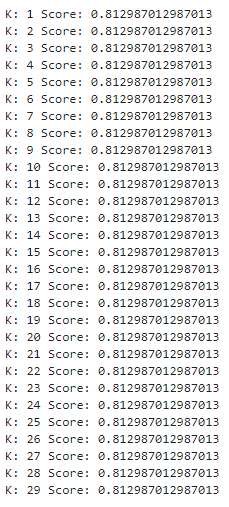

年齡根據 0到10, 10到30, 30到50, 50到100, 以及樓層

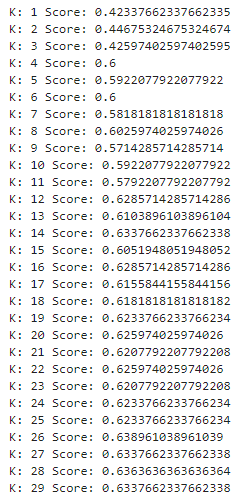

年齡和存活

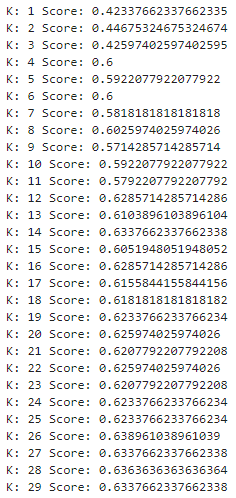

觀察上列圖片可發現，是否存活 和 (是否存活和樓層)兩種比較高，

其中兩者都能達到0.813的準確率，整體的數據來說 (是否存活和樓層)表現會更好，

因此選擇使用(是否存活和樓層)來預測性別

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

df = pd.read_csv('titanic.csv')
X = df[['PClass', 'Survived']][0:1282].replace(['1st', '2nd', '3rd'],[1, 2, 3]).fillna(500).values#將NAN替換成
y = df['Sex'][0:1282].replace(['female','male'],[1, 0]).values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Suitable = 30
for k in range(1, Suitable):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predict_y_test = knn.predict(X_test)
    print('K:', k, 'Score:', knn.score(X_test, y_test))     

### 預測年齡
因為年齡有NAN的資料，所以先排除掉所有有NAN的資料，

並對年齡根據 0到10, 10到30, 30到50, 50到100進行分組


樓層

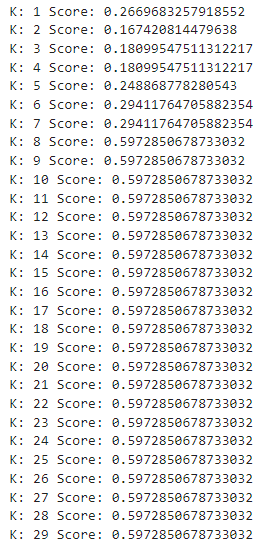

是否存活

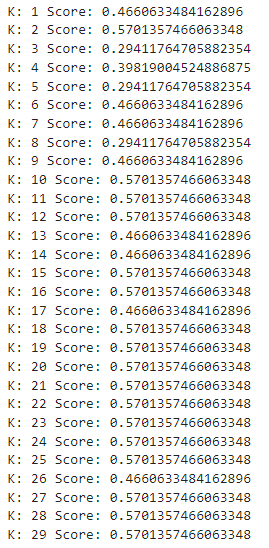

性別

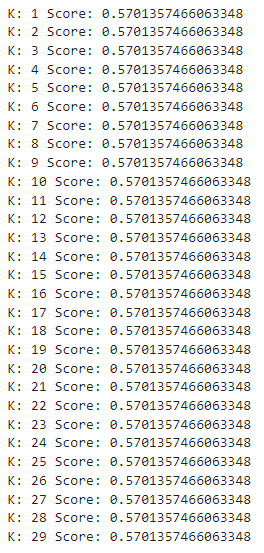

是否存活和樓層

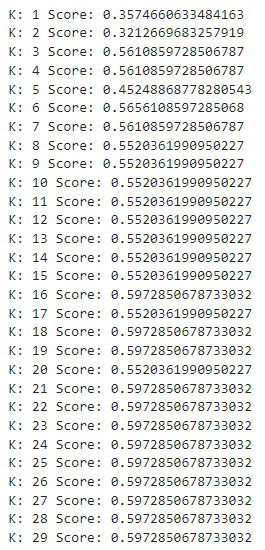

性別以及樓層

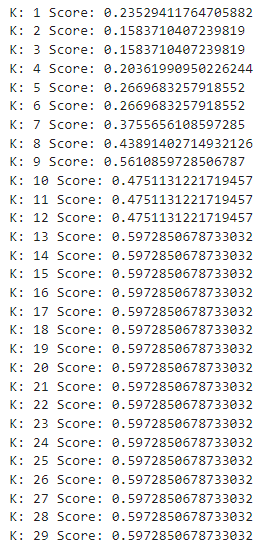

性別和存活

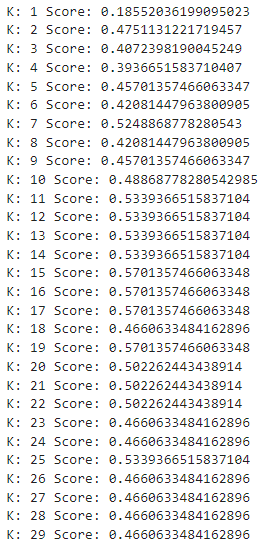

觀察上列圖片可發現，大多數的準確綠都不高，因為對年齡總共分成了四組來處理，

在數據中，性別 和 (是否存活和性別)兩種相較之下表現比較好，

兩者都能達到0.57的準確率，整體的數據來說，性別表現會更好，

因此選擇使用性別來預測年齡

In [33]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

df = pd.read_csv('titanic.csv')

y = df['Age'][0:1282].dropna().values
X = df[['Age', 'Sex']][0:1282].replace(['female','male', '1st', '2nd', '3rd'],[1, 0, 1, 2, 3]).dropna().drop(['Age'], axis = 1).values#將NAN替換成

for i in range(734):
    if y[i] <= 10:
        y[i] = 0
    elif y[i] <= 30:
        y[i] = 1
    elif y[i] <= 50:
        y[i] = 2
    elif y[i] <= 100:
        y[i] = 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Suitable = 30
for k in range(1, Suitable):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predict_y_test = knn.predict(X_test)
    print('K:', k, 'Score:', knn.score(X_test, y_test))     

K: 1 Score: 0.5701357466063348
K: 2 Score: 0.5701357466063348
K: 3 Score: 0.5701357466063348
K: 4 Score: 0.5701357466063348
K: 5 Score: 0.5701357466063348
K: 6 Score: 0.5701357466063348
K: 7 Score: 0.5701357466063348
K: 8 Score: 0.5701357466063348
K: 9 Score: 0.5701357466063348
K: 10 Score: 0.5701357466063348
K: 11 Score: 0.5701357466063348
K: 12 Score: 0.5701357466063348
K: 13 Score: 0.5701357466063348
K: 14 Score: 0.5701357466063348
K: 15 Score: 0.5701357466063348
K: 16 Score: 0.5701357466063348
K: 17 Score: 0.5701357466063348
K: 18 Score: 0.5701357466063348
K: 19 Score: 0.5701357466063348
K: 20 Score: 0.5701357466063348
K: 21 Score: 0.5701357466063348
K: 22 Score: 0.5701357466063348
K: 23 Score: 0.5701357466063348
K: 24 Score: 0.5701357466063348
K: 25 Score: 0.5701357466063348
K: 26 Score: 0.5701357466063348
K: 27 Score: 0.5701357466063348
K: 28 Score: 0.5701357466063348
K: 29 Score: 0.5701357466063348
